In [162]:
import html5lib
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib notebook

In [145]:
def pickleme(temp, filename):
    
    with open(filename + '.pkl', 'w') as picklefile:
        pickle.dump(temp, picklefile)
    
    return

In [146]:
def getpickle(filename):

    try:
        with open(filename + '.pkl', 'r') as picklefile:
            return pickle.load(picklefile)
    except:
        return 'There was an error trying to read this file.  Please check the filename or path.'

In [147]:
countrynames = pd.read_csv('UNcountrieswith3166codes.csv')

In [148]:
len(countrynames)

193

In [173]:
pickleme(countrynames, 'UNcountrieswith3166codes')

In [150]:
countrynames = getpickle('UNcountrieswith3166codes')

In [151]:
urlx = 'http://www.visionofhumanity.org/#/page/indexes/global-peace-index'
urlx = 'http://www.transparency.org/cpi2015#results-table'

In [152]:
countrynames.head(3)

,ISO-3166,Country,Date of Admission to UN
0,AFG,Afghanistan,19-11-1946
1,ALB,Albania,14-12-1955
2,DZA,Algeria,10-08-1962


In [204]:
peaceindex = pd.read_csv('index.csv')

del peaceindex['Source']

peaceindex.columns = ['Country', 'Score', 'PeaceIndex2015','TerrorismIndex','ActiveInsurgency',
                     'InactiveInsurgency']

peaceindex.head(3)

       Country   Score  PeaceIndex2015  TerrorismIndex  ActiveInsurgency  \
0  Afghanistan  70.577           3.427            9.23                21   
1      Albania  12.421           1.821            2.12                 0   
2      Algeria  46.881           2.131            4.75                21   

   InactiveInsurgency  
0                   0  
1                   0  
2                   0  

In [205]:
index = countrynames.merge(peaceindex,on='Country', how='outer')

In [206]:
len(index)

195

In [207]:
index

    ISO-3166      Country Date of Admission to UN   Score  PeaceIndex2015  \
0        AFG  Afghanistan              19-11-1946  70.577           3.427   
1        ALB      Albania              14-12-1955  12.421           1.821   
2        DZA      Algeria              10-08-1962  46.881           2.131   
3        AND      Andorra              28-07-1993     NaN             NaN   
4        AGO       Angola              12-01-1976   3.220           2.020   
..       ...          ...                     ...     ...             ...   
190      YEM        Yemen              30-09-1947  62.951           2.751   
191      ZMB       Zambia              12-01-1964   1.846           1.846   
192      ZWE     Zimbabwe              25-08-1980  10.844           2.294   
193      NaN       Kosovo                     NaN  17.038           1.938   
194      NaN       Taiwan                     NaN   2.407           1.657   

     TerrorismIndex  ActiveInsurgency  InactiveInsurgency  
0              

In [208]:
pickleme(index, 'securityindex')

In [209]:
insurgenciesindex = pd.read_csv('insurgencies.csv')

In [210]:
pickleme(index, 'insurgenciesindex')

In [211]:
securityindex.to_csv('securityindex.csv')

In [212]:
securityindex = index.dropna()

len(securityindex)

160

<IPython.core.display.Javascript object>


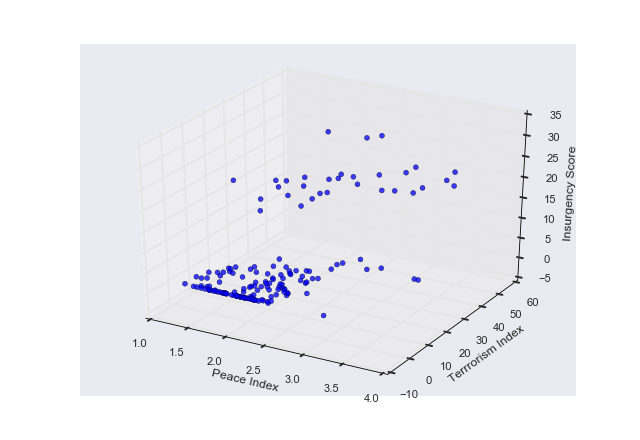

In [214]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pd.set_option('html',False)
pd.set_option('max_columns',30)
pd.set_option('max_rows',10)

# What follows is a copy of the 3D plot example code.

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 100

weight = 5

for c, m, zl, zh in [('r', 'o', -60, -25), ('b', '^', -30, -5)]:
    xs = securityindex.PeaceIndex2015
    ys = map(lambda i: i * weight, securityindex.TerrorismIndex)
    zs = securityindex.ActiveInsurgency + securityindex.InactiveInsurgency

#     ax.scatter(xs, ys, zs, c=c, marker=m)

    ax.scatter(xs, ys, zs, c='blue', marker='o', alpha = 0.5)

ax.set_xlabel('Peace Index')
ax.set_ylabel('Terrrorism Index')
ax.set_zlabel('Insurgency Score')

plt.show()